<a href="https://colab.research.google.com/github/tomek-l/fire/blob/master/Binary_fire_classifier_VGG_false_positive_and_negatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VGG-16 based binary fire classifier

# Binary classifier based of VGG-16 

In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))



Using TensorFlow backend.
W0620 17:57:08.929672 140235147822976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 17:57:08.956001 140235147822976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 17:57:08.960243 140235147822976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0620 17:57:08.991377 140235147822976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 2s 0us/step


W0620 17:57:12.207981 140235147822976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0620 17:57:12.212265 140235147822976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

In [3]:
model.summary()
len(model.trainable_weights)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


4

In [4]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/gdrive/My Drive/FireVideo/binary_dataset/train',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        directory='/content/gdrive/My Drive/FireVideo/binary_dataset/validation',
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 1826 images belonging to 2 classes.
Found 191 images belonging to 2 classes.


W0620 17:57:13.894152 140235147822976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0620 17:57:13.909408 140235147822976 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
 - 103s - loss: 0.4953 - acc: 0.7819 - val_loss: 0.3532 - val_acc: 0.9008
Epoch 2/30
 - 99s - loss: 0.3693 - acc: 0.8619 - val_loss: 0.2695 - val_acc: 0.9347
Epoch 3/30
 - 94s - loss: 0.2907 - acc: 0.9019 - val_loss: 0.2424 - val_acc: 0.9271
Epoch 4/30
 - 101s - loss: 0.2819 - acc: 0.8969 - val_loss: 0.2114 - val_acc: 0.9309
Epoch 5/30
 - 65s - loss: 0.2494 - acc: 0.9132 - val_loss: 0.2138 - val_acc: 0.9384
Epoch 6/30
 - 58s - loss: 0.2612 - acc: 0.9062 - val_loss: 0.2012 - val_acc: 0.9358
Epoch 7/30
 - 58s - loss: 0.2316 - acc: 0.9075 - val_loss: 0.1931 - val_acc: 0.9234
Epoch 8/30
 - 59s - loss: 0.2389 - acc: 0.9150 - val_loss: 0.1916 - val_acc: 0.9334
Epoch 9/30
 - 59s - loss: 0.2150 - acc: 0.9206 - val_loss: 0.1741 - val_acc: 0.9334
Epoch 10/30
 - 58s - loss: 0.2360 - acc: 0.9156 - val_loss: 0.1642 - val_acc: 0.9410
Epoch 11/30
 - 60s - loss: 0.2138 - acc: 0.9256 - val_loss: 0.1830 - val_acc: 0.9359
Epoch 12/30
 - 59s - loss: 0.2308 - acc: 0.9087 - val_loss: 0.1779 - val

KeyboardInterrupt: ignored

# On what images is the model wrong?

(98, 1080, 1920, 3)


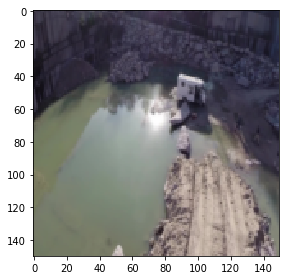

In [26]:
from skimage import transform,io
import numpy as np
import os

#Load the images
dir = '/content/gdrive/My Drive/FireVideo/binary_dataset/validation/negatives/'
images = np.array([io.imread(dir+f) for f in os.listdir(dir)])
print(images.shape)
#display an image resized for the model

In [0]:
resized_images = np.array([transform.resize(i, (150,150), mode='symmetric') for i in images]) #probs not my greatest numpy code...

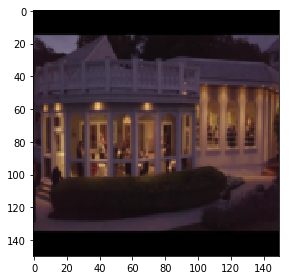

In [30]:
io.imshow(resized_images[0])

In [0]:
predictions_for_negatives = model.predict(resized_images)

# False positives

<Figure size 576x576 with 0 Axes>

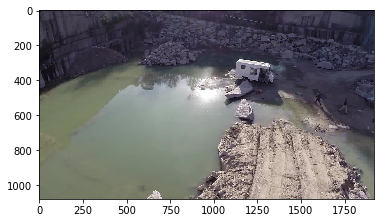

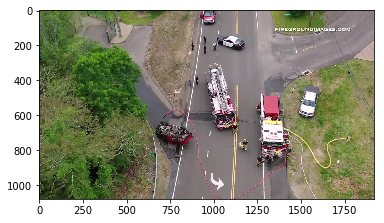

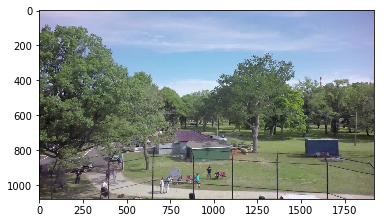

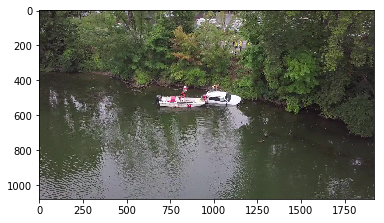

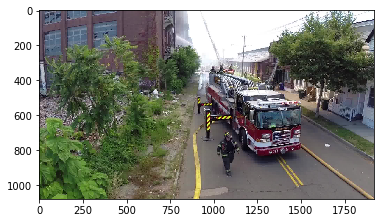

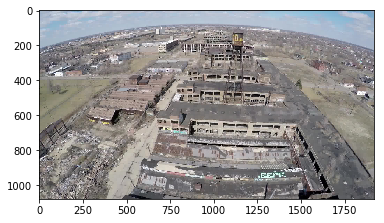

In [43]:
import matplotlib.pyplot as plt

for idx, pred in enumerate(predictions_for_negatives):
  if pred > 0.5:
    plt.figure()
    plt.imshow(images[idx])

plt.show()

# Let's look at false negatives now

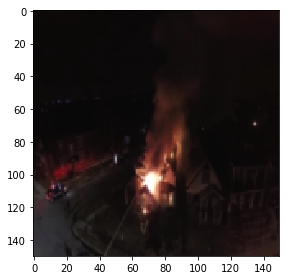

In [44]:
dir = '/content/gdrive/My Drive/FireVideo/binary_dataset/validation/positives/'
images = np.array([io.imread(dir+f) for f in os.listdir(dir)])
resized_images = np.array([transform.resize(i, (150,150), mode='symmetric') for i in images])
io.imshow(resized_images[0])

In [0]:
positive_predictions = model.predict(resized_images)

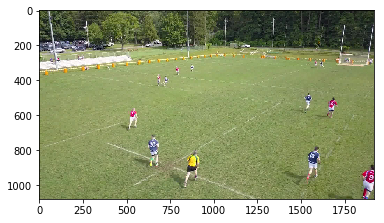

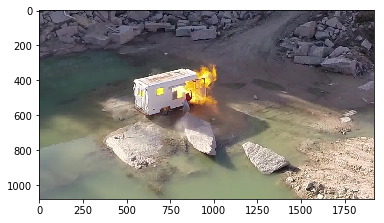

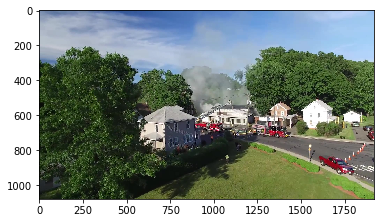

In [47]:
for idx, pred in enumerate(positive_predictions):
  if pred < 0.5:
    plt.figure()
    plt.imshow(images[idx])

plt.show()